#**Determining Ideal House Price using Linear Regression (Python)**

In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [87]:
df = pd.read_csv('House_Price.csv',header=0)

In [88]:
df.head(5)
##df.shape

,price,crime_rate,resid_area,air_qual,room_num,age,dist1,dist2,dist3,dist4,teachers,poor_prop,airport,n_hos_beds,n_hot_rooms,waterbody,rainfall,bus_ter,parks
0,24.0,0.00632,32.31,0.538,6.575,65.2,4.35,3.81,4.18,4.01,24.7,4.98,YES,5.480,11.1920,River,23,YES,0.049347
1,21.6,0.02731,37.07,0.469,6.421,78.9,4.99,4.70,5.12,5.06,22.2,9.14,NO,7.332,12.1728,Lake,42,YES,0.046146
2,34.7,0.02729,37.07,0.469,7.185,61.1,5.03,4.86,5.01,4.97,22.2,4.03,NO,7.394,101.1200,None,38,YES,0.045764
3,33.4,0.03237,32.18,0.458,6.998,45.8,6.21,5.93,6.16,5.96,21.3,2.94,YES,9.268,11.2672,Lake,45,YES,0.047151
4,36.2,0.06905,32.18,0.458,7.147,54.2,6.16,5.86,6.37,5.86,21.3,5.33,NO,8.824,11.2896,Lake,55,YES,0.039474


In [89]:
df.describe()

,price,crime_rate,resid_area,air_qual,room_num,age,dist1,dist2,dist3,dist4,teachers,poor_prop,n_hos_beds,n_hot_rooms,rainfall,parks
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,498.000000,506.000000,506.000000,506.000000
mean,22.528854,3.613524,41.136779,0.554695,6.284634,68.574901,3.971996,3.628775,3.960672,3.618972,21.544466,12.653063,7.899767,13.041605,39.181818,0.054454
std,9.182176,8.601545,6.860353,0.115878,0.702617,28.148861,2.108532,2.108580,2.119797,2.099203,2.164946,7.141062,1.476683,5.238957,12.513697,0.010632
min,5.000000,0.006320,30.460000,0.385000,3.561000,2.900000,1.130000,0.920000,1.150000,0.730000,18.000000,1.730000,5.268000,10.057600,3.000000,0.033292
25%,17.025000,0.082045,35.190000,0.449000,5.885500,45.025000,2.270000,1.940000,2.232500,1.940000,19.800000,6.950000,6.634500,11.189800,28.000000,0.046464
50%,21.200000,0.256510,39.690000,0.538000,6.208500,77.500000,3.385000,3.010000,3.375000,3.070000,20.950000,11.360000,7.999000,12.720000,39.000000,0.053507
75%,25.000000,3.677082,48.100000,0.624000,6.623500,94.075000,5.367500,4.992500,5.407500,4.985000,22.600000,16.955000,9.088000,14.170800,50.000000,0.061397
max,50.000000,88.976200,57.740000,0.871000,8.780000,100.000000,12.320000,11.930000,12.320000,11.940000,27.400000,37.970000,10.876000,101.120000,60.000000,0.086711


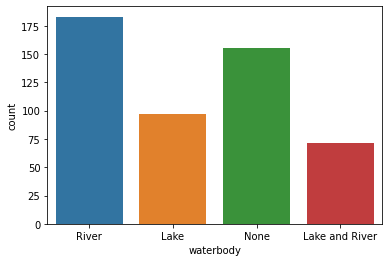

In [90]:
##plt.bar(df.waterbody)
sns.countplot(x="waterbody", data = df)

In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   price        506 non-null    float64
 1   crime_rate   506 non-null    float64
 2   resid_area   506 non-null    float64
 3   air_qual     506 non-null    float64
 4   room_num     506 non-null    float64
 5   age          506 non-null    float64
 6   dist1        506 non-null    float64
 7   dist2        506 non-null    float64
 8   dist3        506 non-null    float64
 9   dist4        506 non-null    float64
 10  teachers     506 non-null    float64
 11  poor_prop    506 non-null    float64
 12  airport      506 non-null    object 
 13  n_hos_beds   498 non-null    float64
 14  n_hot_rooms  506 non-null    float64
 15  waterbody    506 non-null    object 
 16  rainfall     506 non-null    int64  
 17  bus_ter      506 non-null    object 
 18  parks        506 non-null    float64
dtypes: float

##Handling Outliers:


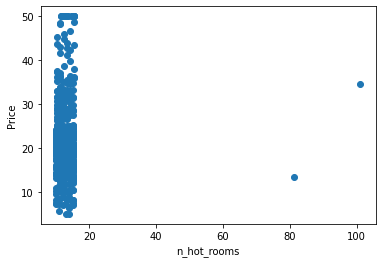

In [92]:
plt.scatter(df.n_hot_rooms,df.price)
plt.xlabel('n_hot_rooms')
plt.ylabel('Price')
plt.show()

In [93]:
np.percentile(df.n_hot_rooms,[99])[0]
uv = np.percentile(df.n_hot_rooms,[99])[0]
uv

15.399519999999999

In [94]:
df.n_hot_rooms[(df.n_hot_rooms> 3*uv)] = 3*uv

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [95]:
df[(df.n_hot_rooms>uv)]

,price,crime_rate,resid_area,air_qual,room_num,age,dist1,dist2,dist3,dist4,teachers,poor_prop,airport,n_hos_beds,n_hot_rooms,waterbody,rainfall,bus_ter,parks
2,34.7,0.02729,37.07,0.4690,7.185,61.1,5.03,4.86,5.01,4.97,22.2,4.03,NO,7.394,46.19856,None,38,YES,0.045764
166,50.0,2.01019,49.58,0.6050,7.929,96.2,2.11,1.91,2.31,1.86,25.3,3.70,YES,8.300,15.40000,River,37,YES,0.052105
204,50.0,0.02009,32.68,0.4161,8.034,31.9,5.41,4.80,5.28,4.99,25.3,2.88,YES,8.900,15.40000,River,51,YES,0.044178
267,50.0,0.57834,33.97,0.5750,8.297,67.0,2.60,2.13,2.43,2.52,27.0,7.44,YES,8.000,15.40000,None,42,YES,0.063235
369,50.0,5.66998,48.10,0.6310,6.683,96.8,1.55,1.28,1.65,0.94,19.8,3.73,YES,6.700,15.40000,River,58,YES,0.067477
423,13.4,7.05042,48.10,0.6140,6.103,85.1,2.08,1.80,2.34,1.87,19.8,23.29,NO,8.268,46.19856,Lake,29,YES,0.063344


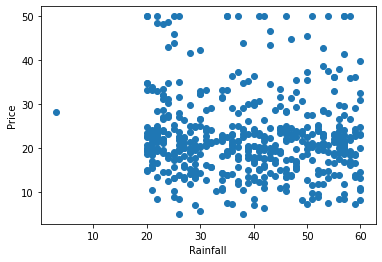

In [96]:
plt.scatter(df.rainfall,df.price)
plt.xlabel('Rainfall')
plt.ylabel('Price')
plt.show()

In [97]:
np.percentile(df.rainfall,[1])[0]
lv = np.percentile(df.rainfall,[1])[0]
lv

20.0

In [98]:
df[(df.rainfall < 0.3*lv)]

,price,crime_rate,resid_area,air_qual,room_num,age,dist1,dist2,dist3,dist4,teachers,poor_prop,airport,n_hos_beds,n_hot_rooms,waterbody,rainfall,bus_ter,parks
213,28.1,0.14052,40.59,0.489,6.375,32.3,4.11,3.92,4.18,3.57,21.4,9.38,YES,7.562,10.2248,None,3,YES,0.044019


In [99]:
df.rainfall[(df.rainfall < 0.3*lv)] = 0.3*lv

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


## Missing Value Imputation

In [100]:
df.n_hos_beds = df.n_hos_beds.fillna(df.n_hos_beds.mean())
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   price        506 non-null    float64
 1   crime_rate   506 non-null    float64
 2   resid_area   506 non-null    float64
 3   air_qual     506 non-null    float64
 4   room_num     506 non-null    float64
 5   age          506 non-null    float64
 6   dist1        506 non-null    float64
 7   dist2        506 non-null    float64
 8   dist3        506 non-null    float64
 9   dist4        506 non-null    float64
 10  teachers     506 non-null    float64
 11  poor_prop    506 non-null    float64
 12  airport      506 non-null    object 
 13  n_hos_beds   506 non-null    float64
 14  n_hot_rooms  506 non-null    float64
 15  waterbody    506 non-null    object 
 16  rainfall     506 non-null    int64  
 17  bus_ter      506 non-null    object 
 18  parks        506 non-null    float64
dtypes: float

## Variale Transformation

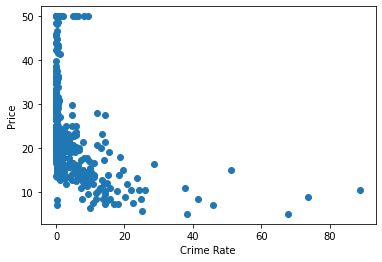

In [101]:
plt.scatter(df.crime_rate,df.price)
plt.xlabel('Crime Rate')
plt.ylabel('Price')
plt.show()

In [102]:
df.crime_rate = np.log(1 + df.crime_rate)

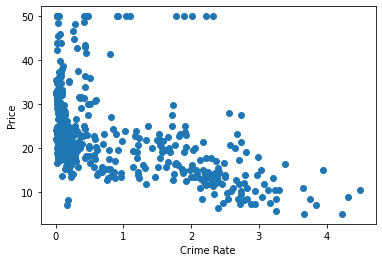

In [103]:
plt.scatter(df.crime_rate,df.price)
plt.xlabel('Crime Rate')
plt.ylabel('Price')
plt.show()

In [104]:
df['avg_dist'] = (df.dist1 + df.dist2 + df.dist3 + df.dist4)/4

In [105]:
df.describe()

,price,crime_rate,resid_area,air_qual,room_num,age,dist1,dist2,dist3,dist4,teachers,poor_prop,n_hos_beds,n_hot_rooms,rainfall,parks,avg_dist
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,22.528854,0.813418,41.136779,0.554695,6.284634,68.574901,3.971996,3.628775,3.960672,3.618972,21.544466,12.653063,7.899767,12.864050,39.187747,0.054454,3.795104
std,9.182176,1.022731,6.860353,0.115878,0.702617,28.148861,2.108532,2.108580,2.119797,2.099203,2.164946,7.141062,1.464939,2.688778,12.497221,0.010632,2.105859
min,5.000000,0.006300,30.460000,0.385000,3.561000,2.900000,1.130000,0.920000,1.150000,0.730000,18.000000,1.730000,5.268000,10.057600,6.000000,0.033292,1.127500
25%,17.025000,0.078853,35.190000,0.449000,5.885500,45.025000,2.270000,1.940000,2.232500,1.940000,19.800000,6.950000,6.659000,11.189800,28.000000,0.046464,2.100625
50%,21.200000,0.228336,39.690000,0.538000,6.208500,77.500000,3.385000,3.010000,3.375000,3.070000,20.950000,11.360000,7.963000,12.720000,39.000000,0.053507,3.207500
75%,25.000000,1.542674,48.100000,0.624000,6.623500,94.075000,5.367500,4.992500,5.407500,4.985000,22.600000,16.955000,9.076000,14.170800,50.000000,0.061397,5.187500
max,50.000000,4.499545,57.740000,0.871000,8.780000,100.000000,12.320000,11.930000,12.320000,11.940000,27.400000,37.970000,10.876000,46.198560,60.000000,0.086711,12.127500


In [106]:
del df['dist1']
del df['dist2']
del df['dist3']
del df['dist4']

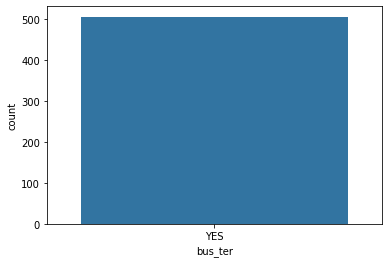

In [107]:
sns.countplot(x="bus_ter", data = df)

In [108]:
del df['bus_ter']

In [109]:
df.describe()

,price,crime_rate,resid_area,air_qual,room_num,age,teachers,poor_prop,n_hos_beds,n_hot_rooms,rainfall,parks,avg_dist
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,22.528854,0.813418,41.136779,0.554695,6.284634,68.574901,21.544466,12.653063,7.899767,12.864050,39.187747,0.054454,3.795104
std,9.182176,1.022731,6.860353,0.115878,0.702617,28.148861,2.164946,7.141062,1.464939,2.688778,12.497221,0.010632,2.105859
min,5.000000,0.006300,30.460000,0.385000,3.561000,2.900000,18.000000,1.730000,5.268000,10.057600,6.000000,0.033292,1.127500
25%,17.025000,0.078853,35.190000,0.449000,5.885500,45.025000,19.800000,6.950000,6.659000,11.189800,28.000000,0.046464,2.100625
50%,21.200000,0.228336,39.690000,0.538000,6.208500,77.500000,20.950000,11.360000,7.963000,12.720000,39.000000,0.053507,3.207500
75%,25.000000,1.542674,48.100000,0.624000,6.623500,94.075000,22.600000,16.955000,9.076000,14.170800,50.000000,0.061397,5.187500
max,50.000000,4.499545,57.740000,0.871000,8.780000,100.000000,27.400000,37.970000,10.876000,46.198560,60.000000,0.086711,12.127500


## Handling Qualitative data (Dummy Variables) 

In [110]:
df = pd.get_dummies(df)

In [111]:
df.describe()

,price,crime_rate,resid_area,air_qual,room_num,age,teachers,poor_prop,n_hos_beds,n_hot_rooms,rainfall,parks,avg_dist,airport_NO,airport_YES,waterbody_Lake,waterbody_Lake and River,waterbody_None,waterbody_River
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,22.528854,0.813418,41.136779,0.554695,6.284634,68.574901,21.544466,12.653063,7.899767,12.864050,39.187747,0.054454,3.795104,0.448617,0.551383,0.191700,0.140316,0.306324,0.361660
std,9.182176,1.022731,6.860353,0.115878,0.702617,28.148861,2.164946,7.141062,1.464939,2.688778,12.497221,0.010632,2.105859,0.497845,0.497845,0.394028,0.347659,0.461422,0.480957
min,5.000000,0.006300,30.460000,0.385000,3.561000,2.900000,18.000000,1.730000,5.268000,10.057600,6.000000,0.033292,1.127500,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,17.025000,0.078853,35.190000,0.449000,5.885500,45.025000,19.800000,6.950000,6.659000,11.189800,28.000000,0.046464,2.100625,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,21.200000,0.228336,39.690000,0.538000,6.208500,77.500000,20.950000,11.360000,7.963000,12.720000,39.000000,0.053507,3.207500,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,25.000000,1.542674,48.100000,0.624000,6.623500,94.075000,22.600000,16.955000,9.076000,14.170800,50.000000,0.061397,5.187500,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,50.000000,4.499545,57.740000,0.871000,8.780000,100.000000,27.400000,37.970000,10.876000,46.198560,60.000000,0.086711,12.127500,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [112]:
del df['airport_NO']
del df['waterbody_None']
df.describe()

,price,crime_rate,resid_area,air_qual,room_num,age,teachers,poor_prop,n_hos_beds,n_hot_rooms,rainfall,parks,avg_dist,airport_YES,waterbody_Lake,waterbody_Lake and River,waterbody_River
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,22.528854,0.813418,41.136779,0.554695,6.284634,68.574901,21.544466,12.653063,7.899767,12.864050,39.187747,0.054454,3.795104,0.551383,0.191700,0.140316,0.361660
std,9.182176,1.022731,6.860353,0.115878,0.702617,28.148861,2.164946,7.141062,1.464939,2.688778,12.497221,0.010632,2.105859,0.497845,0.394028,0.347659,0.480957
min,5.000000,0.006300,30.460000,0.385000,3.561000,2.900000,18.000000,1.730000,5.268000,10.057600,6.000000,0.033292,1.127500,0.000000,0.000000,0.000000,0.000000
25%,17.025000,0.078853,35.190000,0.449000,5.885500,45.025000,19.800000,6.950000,6.659000,11.189800,28.000000,0.046464,2.100625,0.000000,0.000000,0.000000,0.000000
50%,21.200000,0.228336,39.690000,0.538000,6.208500,77.500000,20.950000,11.360000,7.963000,12.720000,39.000000,0.053507,3.207500,1.000000,0.000000,0.000000,0.000000
75%,25.000000,1.542674,48.100000,0.624000,6.623500,94.075000,22.600000,16.955000,9.076000,14.170800,50.000000,0.061397,5.187500,1.000000,0.000000,0.000000,1.000000
max,50.000000,4.499545,57.740000,0.871000,8.780000,100.000000,27.400000,37.970000,10.876000,46.198560,60.000000,0.086711,12.127500,1.000000,1.000000,1.000000,1.000000


##Correlation Analysis

In [113]:
df.corr()

,price,crime_rate,resid_area,air_qual,room_num,age,teachers,poor_prop,n_hos_beds,n_hot_rooms,rainfall,parks,avg_dist,airport_YES,waterbody_Lake,waterbody_Lake and River,waterbody_River
price,1.000000,-0.466527,-0.484754,-0.429300,0.696304,-0.377999,0.505655,-0.740836,0.108880,0.017007,-0.047200,-0.391574,0.249289,0.182867,0.036233,-0.037497,0.071751
crime_rate,-0.466527,1.000000,0.660283,0.707587,-0.288784,0.559591,-0.390052,0.608970,-0.004089,0.056570,0.082151,0.638951,-0.586371,-0.134486,-0.025390,0.009076,-0.060099
resid_area,-0.484754,0.660283,1.000000,0.763651,-0.391676,0.644779,-0.383248,0.603800,0.005799,-0.003761,0.055845,0.707635,-0.708022,-0.115401,-0.026590,0.051649,-0.098976
air_qual,-0.429300,0.707587,0.763651,1.000000,-0.302188,0.731470,-0.188933,0.590879,-0.049553,0.007238,0.091956,0.915544,-0.769247,-0.073903,-0.046393,0.013849,-0.037772
room_num,0.696304,-0.288784,-0.391676,-0.302188,1.000000,-0.240265,0.355501,-0.613808,0.032009,0.014583,-0.064718,-0.282817,0.205241,0.163774,-0.004195,0.010554,0.046251
age,-0.377999,0.559591,0.644779,0.731470,-0.240265,1.000000,-0.261515,0.602339,-0.021012,0.013918,0.074684,0.673850,-0.747906,0.005101,0.003452,-0.004354,-0.088609
teachers,0.505655,-0.390052,-0.383248,-0.188933,0.355501,-0.261515,1.000000,-0.374044,-0.008056,-0.037007,-0.045928,-0.187004,0.232452,0.069437,0.048717,-0.046981,0.094256
poor_prop,-0.740836,0.608970,0.603800,0.590879,-0.613808,0.602339,-0.374044,1.000000,-0.066008,0.017036,0.061444,0.552310,-0.496967,-0.095054,0.003197,0.020620,-0.109004
n_hos_beds,0.108880,-0.004089,0.005799,-0.049553,0.032009,-0.021012,-0.008056,-0.066008,1.000000,-0.003130,0.058596,-0.071272,-0.027871,-0.006365,0.042278,0.059482,-0.074148
n_hot_rooms,0.017007,0.056570,-0.003761,0.007238,0.014583,0.013918,-0.037007,0.017036,-0.003130,1.000000,0.014869,0.023757,-0.020700,-0.055338,0.037925,0.014755,-0.064096


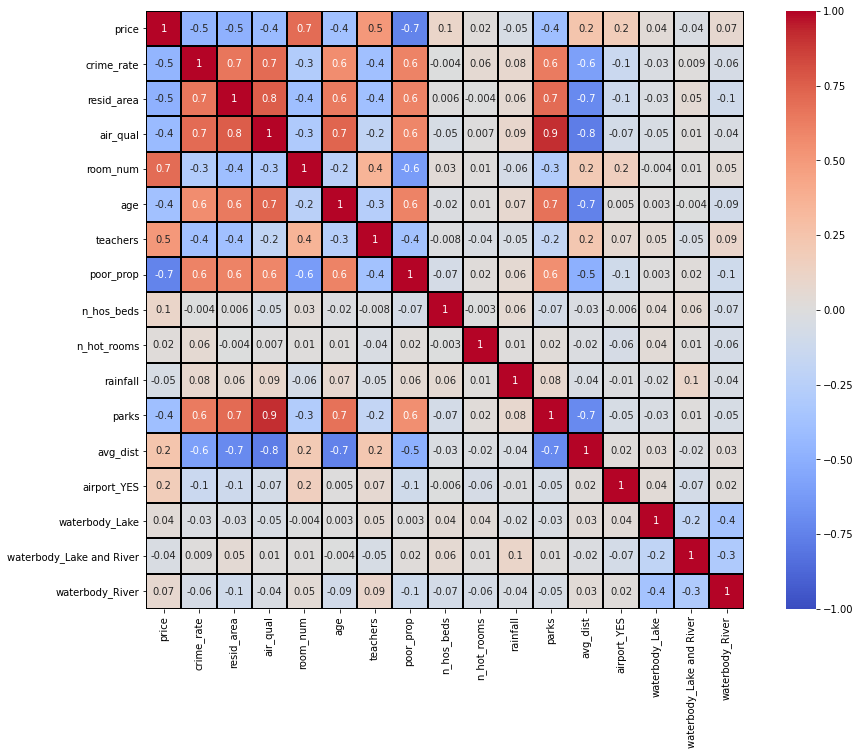

In [114]:
plt.subplots(figsize=(15,11))
sns.heatmap(df.corr(), annot=True,vmin=-1, vmax=1, center= 0, cmap= 'coolwarm', fmt='.1g', square=True, linewidths=1, linecolor='black')
plt.show()

In [115]:
del df['parks']
df.head()

,price,crime_rate,resid_area,air_qual,room_num,age,teachers,poor_prop,n_hos_beds,n_hot_rooms,rainfall,avg_dist,airport_YES,waterbody_Lake,waterbody_Lake and River,waterbody_River
0,24.0,0.006300,32.31,0.538,6.575,65.2,24.7,4.98,5.480,11.19200,23,4.0875,1,0,0,1
1,21.6,0.026944,37.07,0.469,6.421,78.9,22.2,9.14,7.332,12.17280,42,4.9675,0,1,0,0
2,34.7,0.026924,37.07,0.469,7.185,61.1,22.2,4.03,7.394,46.19856,38,4.9675,0,0,0,0
3,33.4,0.031857,32.18,0.458,6.998,45.8,21.3,2.94,9.268,11.26720,45,6.0650,1,1,0,0
4,36.2,0.066770,32.18,0.458,7.147,54.2,21.3,5.33,8.824,11.28960,55,6.0625,0,1,0,0


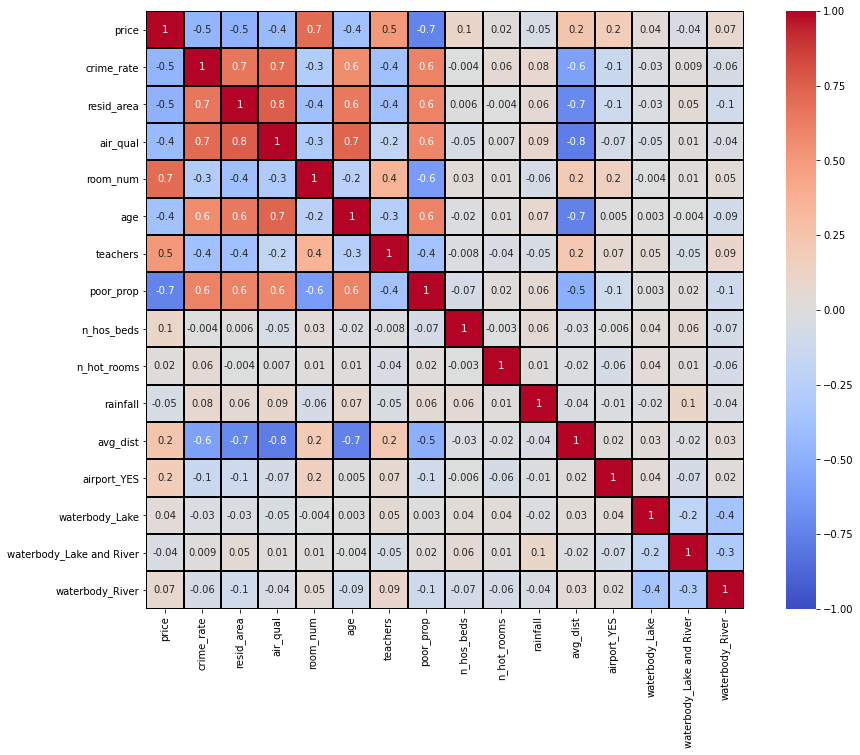

In [116]:
plt.subplots(figsize=(15,11))
sns.heatmap(df.corr(), annot=True,vmin=-1, vmax=1, center= 0, cmap= 'coolwarm', fmt='.1g', square=True, linewidths=1, linecolor='black')
plt.show()

## Test Train Data Split

In [117]:
from sklearn.linear_model import LinearRegression

In [118]:
x_ml = df.drop("price",axis = 1)
x_ml.head()

,crime_rate,resid_area,air_qual,room_num,age,teachers,poor_prop,n_hos_beds,n_hot_rooms,rainfall,avg_dist,airport_YES,waterbody_Lake,waterbody_Lake and River,waterbody_River
0,0.006300,32.31,0.538,6.575,65.2,24.7,4.98,5.480,11.19200,23,4.0875,1,0,0,1
1,0.026944,37.07,0.469,6.421,78.9,22.2,9.14,7.332,12.17280,42,4.9675,0,1,0,0
2,0.026924,37.07,0.469,7.185,61.1,22.2,4.03,7.394,46.19856,38,4.9675,0,0,0,0
3,0.031857,32.18,0.458,6.998,45.8,21.3,2.94,9.268,11.26720,45,6.0650,1,1,0,0
4,0.066770,32.18,0.458,7.147,54.2,21.3,5.33,8.824,11.28960,55,6.0625,0,1,0,0


In [119]:
y_ml = df['price']
y_ml.head()

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: price, dtype: float64

In [120]:
from sklearn.model_selection import train_test_split

In [121]:
x_train,x_test,y_train,y_test = train_test_split(x_ml, y_ml, test_size = 0.2, random_state=12)

In [122]:
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(404, 15) (102, 15) (404,) (102,)


## Linear Regression

In [123]:
lm = LinearRegression()

In [124]:
from sklearn.metrics import r2_score

In [125]:
lm.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [126]:
r2_score(y_train, lm.predict(x_train))

0.7116191817990127

In [167]:
 LM_R2 = r2_score(y_test,lm.predict(x_test))

In [168]:
print(LM_R2)

0.7488154351021615


## OLS Regression

In [128]:
import statsmodels.api as sm

In [129]:
x_ml_constant = sm.add_constant(x_ml)

In [130]:
x_ml_constant.head()

,const,crime_rate,resid_area,air_qual,room_num,age,teachers,poor_prop,n_hos_beds,n_hot_rooms,rainfall,avg_dist,airport_YES,waterbody_Lake,waterbody_Lake and River,waterbody_River
0,1.0,0.006300,32.31,0.538,6.575,65.2,24.7,4.98,5.480,11.19200,23,4.0875,1,0,0,1
1,1.0,0.026944,37.07,0.469,6.421,78.9,22.2,9.14,7.332,12.17280,42,4.9675,0,1,0,0
2,1.0,0.026924,37.07,0.469,7.185,61.1,22.2,4.03,7.394,46.19856,38,4.9675,0,0,0,0
3,1.0,0.031857,32.18,0.458,6.998,45.8,21.3,2.94,9.268,11.26720,45,6.0650,1,1,0,0
4,1.0,0.066770,32.18,0.458,7.147,54.2,21.3,5.33,8.824,11.28960,55,6.0625,0,1,0,0


In [131]:
lm_ml = sm.OLS(y_ml,x_ml_constant).fit()

In [132]:
lm_ml.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.721
Model:                            OLS   Adj. R-squared:                  0.712
Method:                 Least Squares   F-statistic:                     84.34
Date:                Sat, 24 Oct 2020   Prob (F-statistic):          4.19e-125
Time:                        06:10:41   Log-Likelihood:                -1516.6
No. Observations:                 506   AIC:                             3065.
Df Residuals:                     490   BIC:                             3133.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       -6.4986      5.264     -1.235      0.218     -16.842       3.844
crime_rate                   0.0097      0.348      0.028      0.978      -0.674       0.694
resid_area                  -0.0409      0.058     -0.710      0.478      -0.154       0.072
air_qual                   -15.8974      4.004     -3.971      0.000     -23.764      -8.031
room_num                     4.0190      0.427      9.421      0.000       3.181       4.857
age                         -0.0057      0.014     -0.420      0.675      -0.032       0.021
teachers                     1.0070      0.122      8.247      0.000       0.767       1.247
poor_prop                   -0.5773      0.053    -10.955      0.000      -0.681      -0.474
n_hos_beds                   0.3292      0.152      2.163      0.031       0.030       0.628
n_hot_rooms                  0.0919      0.082      1.118      0.264      -0.070       0.253
rainfall                     0.0161      0.018      0.904      0.367      -0.019       0.051
avg_dist                    -1.2186      0.189     -6.450      0.000      -1.590      -0.847
airport_YES                  1.1315      0.454      2.491      0.013       0.239       2.024
waterbody_Lake               0.2641      0.642      0.411      0.681      -0.997       1.525
waterbody_Lake and River    -0.6876      0.714     -0.963      0.336      -2.090       0.715
waterbody_River             -0.2913      0.547     -0.533      0.594      -1.365       0.783
==============================================================================
Omnibus:                      182.596   Durbin-Watson:                   0.990
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              826.137
Skew:                           1.554   Prob(JB):                    4.04e-180
Kurtosis:                       8.434   Cond. No.                     2.37e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.37e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [172]:
OLS_R2 = lm_ml.rsquared_adj

##Ridge Regression

In [133]:
from sklearn import preprocessing

In [134]:
scaler = preprocessing.StandardScaler().fit(x_train)

In [135]:
x_train_scaled = scaler.transform(x_train)

In [136]:
x_test_scaled = scaler.transform(x_test)

In [137]:
from sklearn.linear_model import Ridge

In [138]:
lm_ridge = Ridge(alpha=0.5)
lm_ridge.fit(x_train_scaled, y_train)

Ridge(alpha=0.5, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [139]:
r2_score(y_test, lm_ridge.predict(x_test_scaled))

0.7489260828343913

In [140]:
from sklearn.model_selection import validation_curve

In [141]:
param_range = np.logspace(-2,8,100)
param_range

array([1.00000000e-02, 1.26185688e-02, 1.59228279e-02, 2.00923300e-02,
       2.53536449e-02, 3.19926714e-02, 4.03701726e-02, 5.09413801e-02,
       6.42807312e-02, 8.11130831e-02, 1.02353102e-01, 1.29154967e-01,
       1.62975083e-01, 2.05651231e-01, 2.59502421e-01, 3.27454916e-01,
       4.13201240e-01, 5.21400829e-01, 6.57933225e-01, 8.30217568e-01,
       1.04761575e+00, 1.32194115e+00, 1.66810054e+00, 2.10490414e+00,
       2.65608778e+00, 3.35160265e+00, 4.22924287e+00, 5.33669923e+00,
       6.73415066e+00, 8.49753436e+00, 1.07226722e+01, 1.35304777e+01,
       1.70735265e+01, 2.15443469e+01, 2.71858824e+01, 3.43046929e+01,
       4.32876128e+01, 5.46227722e+01, 6.89261210e+01, 8.69749003e+01,
       1.09749877e+02, 1.38488637e+02, 1.74752840e+02, 2.20513074e+02,
       2.78255940e+02, 3.51119173e+02, 4.43062146e+02, 5.59081018e+02,
       7.05480231e+02, 8.90215085e+02, 1.12332403e+03, 1.41747416e+03,
       1.78864953e+03, 2.25701972e+03, 2.84803587e+03, 3.59381366e+03,
      

In [142]:
train_scores,test_scores = validation_curve(Ridge(), x_train_scaled, y_train,"alpha", param_range, cv=3, scoring= 'r2')

In [143]:
train_mean = np.mean(train_scores, axis= 1)

In [144]:
test_mean = np.mean(test_scores, axis= 1)

In [145]:
max(test_mean)

0.6808911452764365

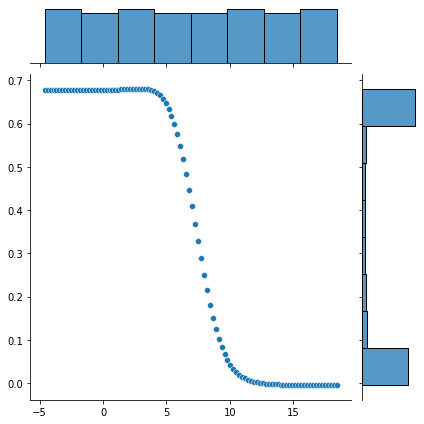

In [146]:
sns.jointplot(x=np.log(param_range),y=test_mean)

In [147]:
np.where(test_mean == max(test_mean))

(array([32]),)

In [148]:
param_range[32]

17.073526474706906

In [149]:
lm_ridge_final = Ridge(alpha=param_range[32])

In [150]:
lm_ridge_final.fit(x_train_scaled,y_train)

Ridge(alpha=17.073526474706906, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [151]:
r2_score(y_test, lm_ridge_final.predict(x_test_scaled))

0.7506180671671319

In [152]:
r2_score(y_train, lm_ridge_final.predict(x_train_scaled))

0.7102283251471009

In [171]:
Ridge_R2 = r2_score(y_test, lm_ridge_final.predict(x_test_scaled))

##Lasso Regression

In [153]:
from sklearn.linear_model import Lasso

In [154]:
lm_lasso = Lasso(alpha=0.5)
lm_lasso.fit(x_train_scaled, y_train)

Lasso(alpha=0.5, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [155]:
r2_score(y_test, lm_lasso.predict(x_test_scaled))

0.7103232409386685

In [156]:
train_scores_L,test_scores_L = validation_curve(Lasso(), x_train_scaled, y_train,"alpha", param_range, cv=3, scoring= 'r2')

In [157]:
train_L_mean = np.mean(train_scores_L, axis= 1)

In [158]:
test_L_mean = np.mean(test_scores_L, axis= 1)

In [159]:
max(test_L_mean)

0.6826226309697571

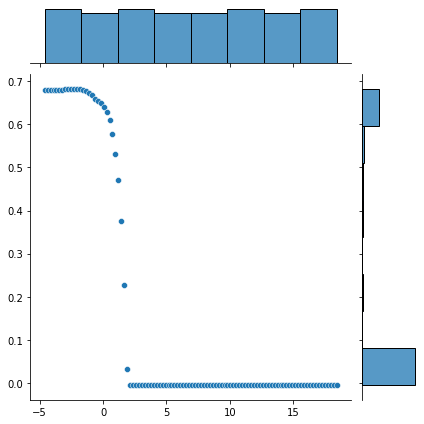

In [160]:
sns.jointplot(x=np.log(param_range),y=test_L_mean)

In [161]:
np.where(test_L_mean == max(test_L_mean))

(array([10]),)

In [162]:
param_range[10]

0.10235310218990264

In [163]:
lm_lasso_final = Lasso(alpha=param_range[10])

In [164]:
lm_lasso_final.fit(x_train_scaled,y_train)

Lasso(alpha=0.10235310218990264, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [165]:
r2_score(y_test, lm_lasso_final.predict(x_test_scaled))

0.7488826005585076

In [166]:
r2_score(y_train, lm_lasso_final.predict(x_train_scaled))

0.7091732003525362

In [173]:
Lasso_R2 = r2_score(y_test, lm_lasso_final.predict(x_test_scaled))

## R2 Comparison

In [226]:
data = [['Linear Regression', LM_R2],
        ['OLS', OLS_R2],
        ['Ridge Regression', Ridge_R2],
        ['Lasso Regression', Lasso_R2]]

In [227]:
df_R2 = pd.DataFrame(data, columns = ['Model','RSquared'])

In [228]:
df_R2.head() 

,Model,RSquared
0,Linear Regression,0.748815
1,OLS,0.712273
2,Ridge Regression,0.750618
3,Lasso Regression,0.748883


<Figure size 432x288 with 0 Axes>

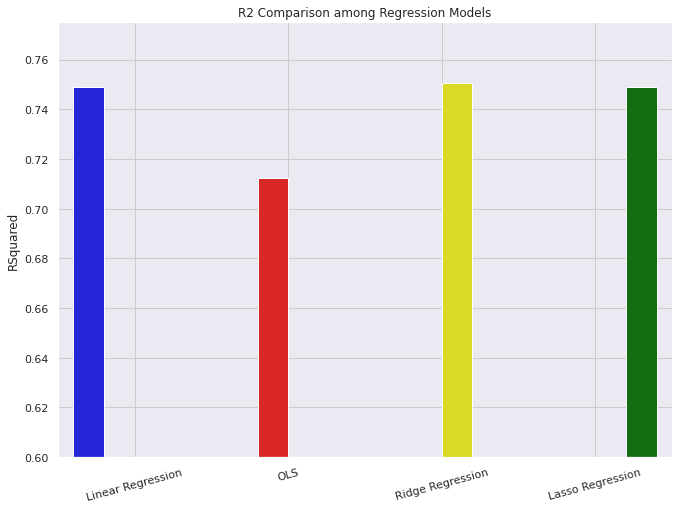

In [229]:
sns.set()
plt.figure()
plt.subplots(figsize=(11,8))
ax = sns.barplot(data=df_R2, x="Model", y="RSquared", hue="Model", palette=['blue', 'red', 'yellow', 'green'], saturation=0.7)
ax.set_title('R2 Comparison among Regression Models')
ax.grid(color='#cccccb')
ax.set_ylabel('RSquared')
ax.set_xlabel(None)
ax.set_xticklabels(df_R2["Model"].unique().astype(str), rotation=15)
ax.get_legend().remove()
ax.set_ylim(ymin=0.6, ymax=0.775)
plt.show()